In [14]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test.csv")

In [16]:
# Drop Id column if exists
train_df.drop(columns=["Id"], inplace=True, errors='ignore')
test_df.drop(columns=["Id"], inplace=True, errors='ignore')

# Target
target = 'SalePrice'

In [17]:
# 3. EDA & Data Visualization
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
# Feature Engineering - fill missing values with mode/median for simplicity
for col in train_df.columns:
    # Skip the target column when filling missing values in the test set
    if col == target and col not in test_df.columns:
        continue

    if train_df[col].dtype == 'object':
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        # Check if the column exists in test_df before filling
        if col in test_df.columns:
            test_df[col].fillna(test_df[col].mode()[0], inplace=True)
    else:
        train_df[col].fillna(train_df[col].median(), inplace=True)
        # Check if the column exists in test_df before filling
        if col in test_df.columns:
            test_df[col].fillna(test_df[col].median(), inplace=True)

<ipython-input-19-e5a3f4df7def>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
<ipython-input-19-e5a3f4df7def>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [20]:
# Encode categorical features
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)


In [21]:
# Align train and test
X, y = train_df.drop(target, axis=1), train_df[target]
test_df = test_df.reindex(columns=X.columns, fill_value=0)

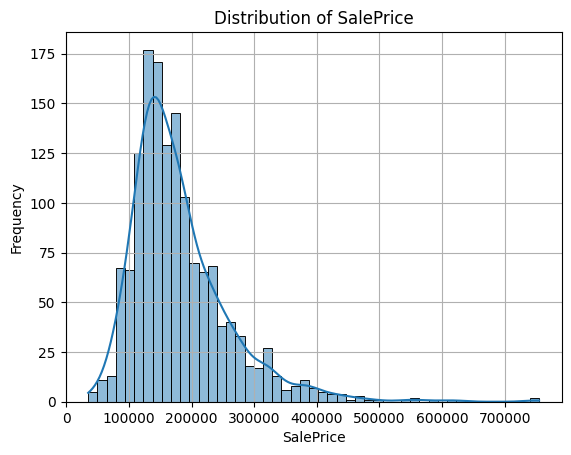

In [22]:
# EDA: Visualize Target
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

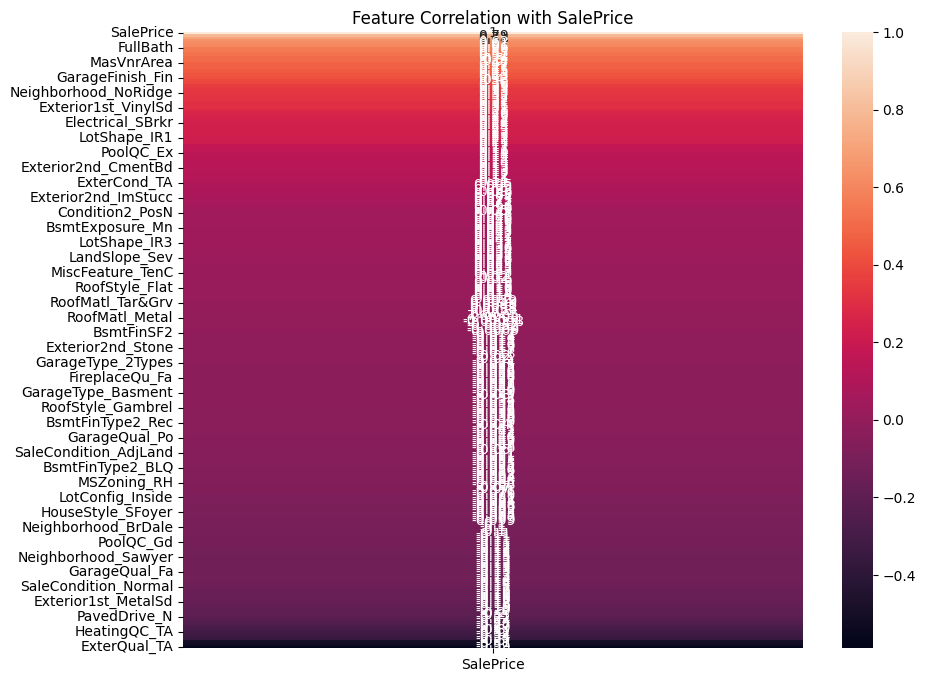

In [23]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(numeric_only=True)[[target]].sort_values(by=target, ascending=False), annot=True)
plt.title("Feature Correlation with SalePrice")
plt.show()

In [24]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

In [26]:
# Evaluation
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

MSE: 873658179.21
RMSE: 29557.71
R^2 Score: 0.8861


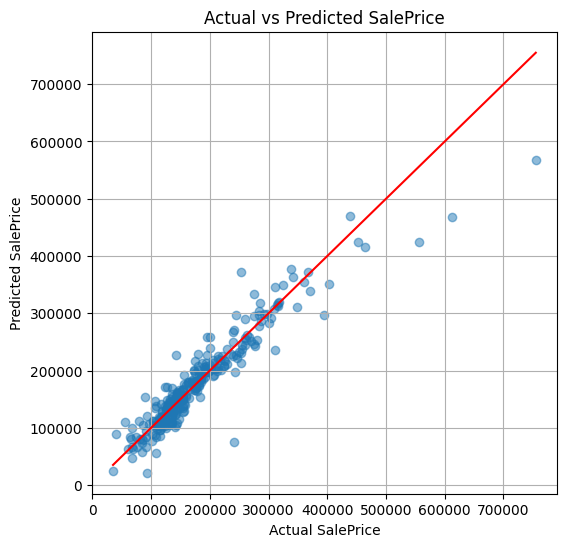

In [27]:
# Visualize Predictions
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.grid(True)
plt.show()

In [ ]:
# 8. Penjelasan Matematis
"""
Mean Squared Error (MSE) = (1/n) * Σ(y_i - y_hat_i)^2
Root Mean Squared Error (RMSE) = sqrt(MSE)
R^2 Score = 1 - [Σ(y_i - y_hat_i)^2 / Σ(y_i - y_mean)^2]

MSE mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi.
RMSE memberi penalti lebih besar untuk kesalahan besar.
R^2 menunjukkan seberapa baik model menjelaskan variansi data.
"""
